In [5]:
from ipywidgets import interact


def f1(x):
    return 2 * x


interact(f1, x=10)


interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f1(x)>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as linalg
import math
from ipywidgets import interact, widgets

# Amount of elements
N = 10
# Amount of nodes
n = N + 1
# Element size
h = 1.0 / N
# Constant
c = 0.4
# Delta time
dt = 0.001
# Amount of iterations
iterations = 20000
# Stepsize
stepSize = 100
# Matrix construction
# Time coefficient matrix
T = np.zeros((n, n))
T[0, 0] = 1  # Left boundary
T[N, N] = 1  # Right boundary
for i in range(1, N):
    for j in range(0, N + 1):
        if(i == j):
            T[i, j] = (2.0 / 3.0) * h
        if(abs(i - j) == 1):
            T[i, j] = (1.0 / 6.0) * h

# Space coefficient matrix
S = np.zeros((n, n))
for i in range(1, N):
    for j in range(0, N + 1):
        if(i == j):
            S[i, j] = (2.0 / h)
        if(abs(i - j) == 1):
            S[i, j] = -(1.0 / h)

# A single time step
def iteration(v, vDer):
    vNew = v + dt * vDer
    q = -c * c * S @ v
    r = linalg.solve(T, q)
    vDerNew = vDer + dt * r
    return (vNew, vDerNew)

# The real solution
def realU(x, t):
    return np.cos(2 * np.pi * t) * np.sin(2 * np.pi * x)


# The initial value of the finite element problem
u = np.zeros((n, 1))
uDer = np.zeros((n, 1))
for i in range(0, n):
    x = i * h
    u[i] = realU(x, 0)


# Real solution
# The real solution
def realU(x, t):
    return np.cos(2 * np.pi * t) * np.sin(2 * np.pi * x)


# The initial value of the finite element problem
u = np.zeros((n, 1))
uDer = np.zeros((n, 1))
for i in range(0, n):
    x = i * h
    u[i] = realU(x, 0)

# Interactive simulation
data = []
data.append(u)
spacing = np.linspace(0.0, 1.0, n)
bigspacing = np.linspace(0.0, 1.0, 100)
for i in range(0, iterations):
    (uNew, uDerNew) = iteration(u, uDer)
    u = uNew
    uDer = uDerNew
    data.append(u)


def animation(t):
    plt.rcParams["figure.figsize"] = (6, 3)
    axes = plt.gca()
    axes.set_ylim([-1.5, 1.5])
    axes.set_xlim([0, 1])
    plt.title("t = " + str(t * dt))
    plt.ylabel("u(x,t)")
    plt.xlabel("x")
    plt.plot(bigspacing, realU(bigspacing, t * dt), "r--", label='Exact')
    plt.plot(spacing, data[t], "b-", label='Numerical')
    plt.legend()


interact(animation, t=widgets.IntSlider(min=0, max=iterations, step=stepSize, value=0))


interactive(children=(IntSlider(value=0, description='t', max=20000, step=100), Output()), _dom_classes=('widg…

<function __main__.animation(t)>

[0, 333, 666, 1000, 3250]


<ipython-input-3-f659876018c2>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax1 = plt.subplot("511")
<ipython-input-3-f659876018c2>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax2 = plt.subplot("512", sharex=ax1)
<ipython-input-3-f659876018c2>:28: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax3 = plt.subplot("513", sharex=ax1)
<ipython-input-3-f659876018c2>:38: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax4 = plt.subplot("514", sharex=ax1)
<ipython-input-3-f659876018c2>:48: MatplotlibDeprecationWarning: Passing 

Text(-0.25, 0.1, 'u(x,t)')

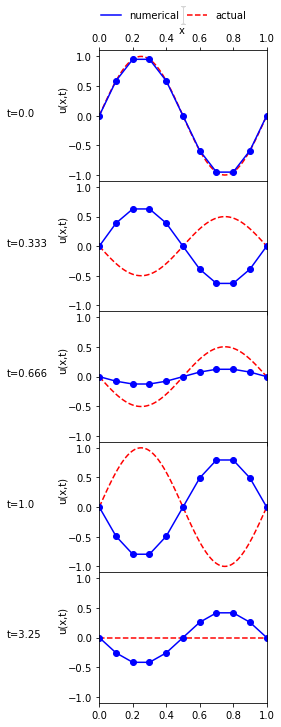

In [3]:
# Static plot
plt.rcParams["figure.figsize"] = (3,12)
timespace = [0, (int)(1.0/(3.0*dt)), (int)(2.0/(3.0*dt)), (int)(1.0/dt), (int)(3.25/dt)]; print(timespace)
plt.subplots_adjust(hspace=.0)

ax1 = plt.subplot("511")
ax1.set_ylim([-1.1,1.1])
ax1.set_xlim([0,1])
plt.plot(bigspacing, realU(bigspacing, timespace[0]*dt), "r--", label='actual')
plt.plot(spacing, data[timespace[0]], "bo")
plt.plot(spacing, data[timespace[0]], "b-", label="numerical")
plt.text(-0.55,0,"t="+str(dt*timespace[0]))
plt.text(-0.25,0.1,"u(x,t)", rotation=90)
plt.text(0.475, 1.4, "x")
plt.legend(bbox_to_anchor=(0.5, 1.2, 0., 0.1), loc=3, ncol=2, mode="expand", borderaxespad=0.)
ax1.xaxis.tick_top()

ax2 = plt.subplot("512", sharex=ax1)
ax2.set_ylim([-1.1,1.1])
ax2.set_xlim([0,1])
plt.plot(bigspacing, realU(bigspacing, timespace[1]*dt), "r--")
plt.plot(spacing, data[timespace[1]], "bo")
plt.plot(spacing, data[timespace[1]], "b-")
plt.text(-0.55,0,"t="+str(dt*timespace[1]))
plt.text(-0.25,0.1,"u(x,t)", rotation=90)
plt.setp(ax2.get_xticklabels(), visible=False)

ax3 = plt.subplot("513", sharex=ax1)
ax3.set_ylim([-1.1,1.1])
ax3.set_xlim([0,1])
plt.plot(bigspacing, realU(bigspacing, timespace[2]*dt), "r--")
plt.plot(spacing, data[timespace[2]], "bo")
plt.plot(spacing, data[timespace[2]], "b-")
plt.text(-0.55,0,"t="+str(dt*timespace[2]))
plt.text(-0.25,0.1,"u(x,t)", rotation=90)
plt.setp(ax3.get_xticklabels(), visible=False)

ax4 = plt.subplot("514", sharex=ax1)
ax4.set_ylim([-1.1,1.1])
ax4.set_xlim([0,1]);plt.plot(bigspacing, realU(bigspacing, timespace[3]*dt), "r--")
plt.plot(spacing, data[timespace[3]], "bo")
plt.plot(spacing, data[timespace[3]], "b-")
plt.text(-0.55,0,"t="+str(dt*timespace[3]))
plt.text(-0.25,0.1,"u(x,t)", rotation=90)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

ax5 = plt.subplot("515", sharex=ax1)
ax5.set_ylim([-1.1,1.1])
ax5.set_xlim([0,1])
plt.plot(bigspacing, realU(bigspacing, timespace[4]*dt), "r--")
plt.plot(spacing, data[timespace[4]], "bo")
plt.plot(spacing, data[timespace[4]], "b-")
plt.text(-0.55,0,"t="+str(dt*timespace[4]))
plt.text(-0.25,0.1,"u(x,t)", rotation=90)

implicit_iter: 20
implicit_iter: 20
implicit_iter: 19
implicit_iter: 19
implicit_iter: 18
implicit_iter: 18
implicit_iter: 17
implicit_iter: 16
implicit_iter: 16
implicit_iter: 15
implicit_iter: 15
implicit_iter: 14
implicit_iter: 13
implicit_iter: 13
implicit_iter: 12
implicit_iter: 12
implicit_iter: 11
implicit_iter: 10
implicit_iter: 10
modified_iter: 11
modified_iter: 11
modified_iter: 10
modified_iter: 10
modified_iter: 9
modified_iter: 9
modified_iter: 9
modified_iter: 8
modified_iter: 8
modified_iter: 8
modified_iter: 7
modified_iter: 7
modified_iter: 7
modified_iter: 6
modified_iter: 6
modified_iter: 5
modified_iter: 5
modified_iter: 5
modified_iter: 4


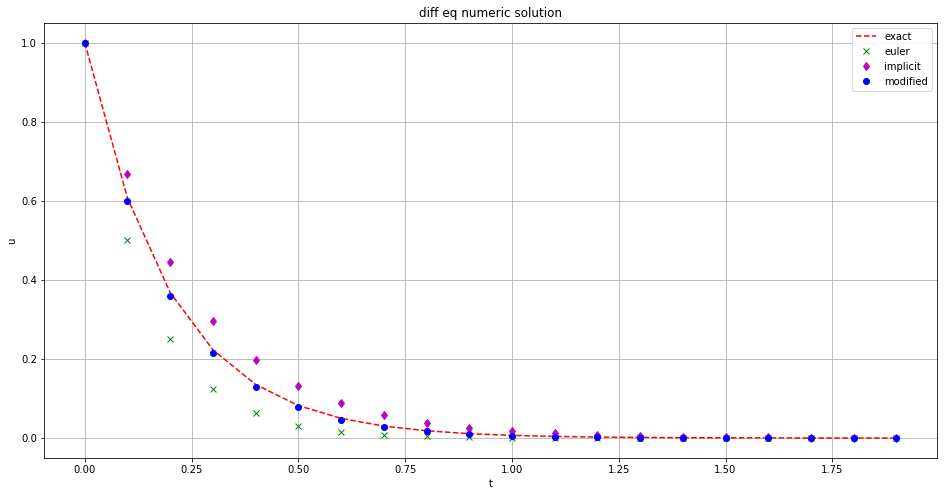

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def right_force(t, u):
    return -5 * u


def exact_u(t):
    return np.exp(-5 * t)


def euler(f, u0, t, h, N):
    u_euler = []
    u_euler.append(u0)
    u_pre = u0
    for n in range(1, N):
        u_cur = u_pre + h * f(t[n], u_pre)
        u_euler.append(u_cur)
        u_pre = u_cur

    return u_euler


def implicit_iter(f, h, u_pre, t, n, eps):
    u_cur0 = u_pre
    du = 1.0
    cnt = 0
    while du > eps:
        u_cur1 = u_pre + h * f(t[n], u_cur0)
        du = np.abs(u_cur1 - u_cur0)
        u_cur0 = u_cur1
        cnt += 1

    print(f"implicit_iter: {cnt}")

    return u_cur1


def implicit_euler(f, u0, t, h, N, eps):
    u_implicit = []
    u_implicit.append(u0)
    u_pre = u0
    for n in range(1, N):
        u_cur = implicit_iter(f, h, u_pre, t, n, eps)
        u_implicit.append(u_cur)
        u_pre = u_cur

    return u_implicit


def modified_iter(f, h, u_pre, t, n, eps):
    u_cur0 = u_pre
    eata = h / 2
    du = 1.0
    cnt = 0
    while du > eps:
        u_cur1 = u_pre + eata * (f(t[n - 1], u_pre) + f(t[n], u_cur0))
        du = np.abs(u_cur1 - u_cur0)
        u_cur0 = u_cur1
        cnt += 1

    print(f"modified_iter: {cnt}")

    return u_cur1


def modified_euler(f, u0, t, h, N, eps):
    u_modified = []
    u_modified.append(u0)
    u_pre = u0
    for n in range(1, N):
        u_cur = modified_iter(f, h, u_pre, t, n, eps)
        u_modified.append(u_cur)
        u_pre = u_cur

    return u_modified


u0 = 1
h = 0.1
T = 2
t = np.arange(0, T, h)
N = len(t)
eps = 1e-6

u_exact = exact_u(t)
u_euler = euler(right_force, u0, t, h, N)
u_implicit = implicit_euler(right_force, u0, t, h, N, eps)
u_modified = modified_euler(right_force, u0, t, h, N, eps)


plt.figure(figsize=(16, 8))

plt.plot(t, u_exact, 'r--', label='exact')
plt.plot(t, u_euler, 'gx', label='euler')
plt.plot(t, u_implicit, 'md', label='implicit')
plt.plot(t, u_modified, 'bo', label='modified')
plt.xlabel("t")
plt.ylabel("u")
plt.title("diff eq numeric solution")
plt.legend(loc='upper right')
plt.grid(True)
